### Handling Age Missing values

In [2]:
import pandas as pd
import numpy as np

C:\Users\hp\AppData\Local\Temp\ipykernel_13740\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
titanic_df = pd.read_csv("C:\\Users\\hp\\Downloads\\archive\\train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
def get_initials(value):
    name = value.split(',')[1]
    initials = name.split('.')[0]
    return initials.strip()

Akternative of above code
```python
result = []
for each in titanic_df['Name']:
    result.append(
        get_initials(each)
    )

#### In short we can use `dataframe.apply()` method of Python to work on above matters

In [6]:
# Lets find out waht are the initials involve in our data.
titanic_df['Initials'] = titanic_df['Name'].apply(get_initials)

In [7]:
titanic_df["Initials"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<Axes: xlabel='Initials'>

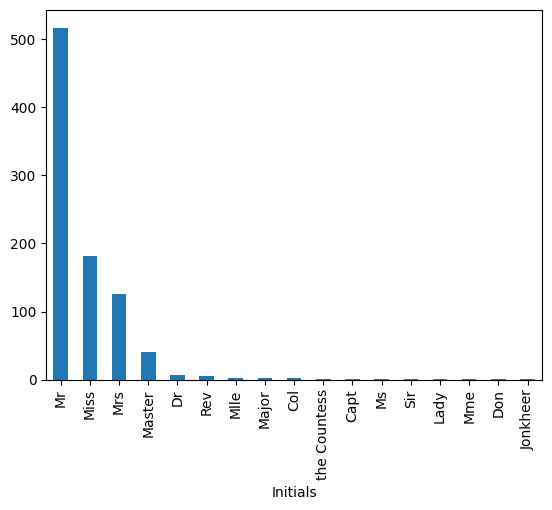

In [8]:
titanic_df["Initials"].value_counts().plot.bar()

#### `DataFrame.replace()`
From above thing we get how many initials are there in our datasets now we mix what can be similar to each other using `DataFrame.replace()`

In [18]:
titanic_df['Initials'].replace(to_replace={'Lady':'Miss', 'Sir':'Mr'}, inplace=True)
titanic_df['Initials'].unique()

array(['Mr', 'Mrs', 'Miss', 'Don', 'Rev', 'Dr', 'Mme', 'Major', 'Mlle',
       'Col', 'the Countess', 'Jonkheer'], dtype=object)

<Axes: xlabel='Initials'>

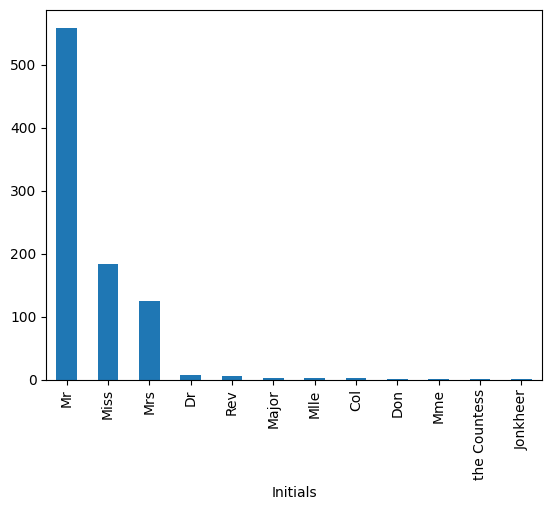

In [19]:
titanic_df['Initials'].value_counts().plot.bar()

In [20]:
titanic_df['Initials'].replace(
    to_replace={'Ms':'Miss', 'Capt':'Mr', 'Master':'Mr', 'Dr':'Mr', 'Col':'Mr', 'Mme':'Mrs', 
               'Don':'Mr', 'Rev':'Mr', 'Major':'Mr', 'Mlle':'Miss', 'the Countess':'Mrs', 
               'Jonkheer':'Mr'}, 
    inplace=True)

In [21]:
titanic_df['Initials'].unique()

array(['Mr', 'Mrs', 'Miss'], dtype=object)

<Axes: xlabel='Initials'>

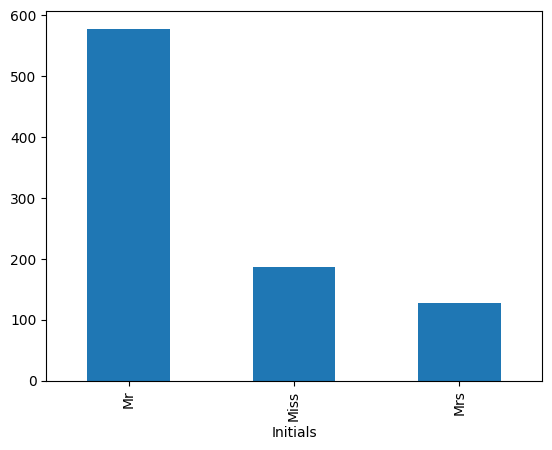

In [23]:
titanic_df['Initials'].value_counts().plot.bar()

In [24]:
titanic_df['Initials'].value_counts()

Initials
Mr      578
Miss    186
Mrs     127
Name: count, dtype: int64

In [25]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64